In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [63]:
# Google Trend Bitcoin - 7 days
df1 = pd.read_csv('1.gt_bitcoin.csv', usecols=[2], skiprows=2, names=['1.gt_bitcoin'])
df1 = df1.shift(7)

# Google Trend Buy Bitcoin - 0 day (no lag)
df2 = pd.read_csv('2.gt_Buy_Bitcoin.csv', usecols=[2], skiprows=2, names=['2.gt_Buy_Bitcoin'])

# Google Trend Sell Bitcoin - 7 days
df3 = pd.read_csv('3.gt_Sell_Bitcoin.csv', usecols=[2], skiprows=2, names=['3.gt_Sell_Bitcoin'])
df3 = df3.shift(7)

# Google Trend Ethereum - 0 day (no lag)
df4 = pd.read_csv('4.gt_ethereum.csv', usecols=[2], skiprows=2, names=['4.gt_ethereum'])

# Google Trend Ukraine War - 7 days
df5 = pd.read_csv('5.gt_Ukraine_war.csv', usecols=[2], skiprows=2, names=['5.gt_Ukraine_war'])
df5 = df5.shift(7)

# Google Trend Covid - 5 days
df6 = pd.read_csv('6.gt_covid.csv', usecols=[2], skiprows=2, names=['6.gt_covid'])
df6 = df6.shift(5)

#SP500 twitter - 0 day (no lag)
df7 = pd.read_csv('7.s&p_twitter.csv', usecols=[2], skiprows=2, names=['7.s&p_twitter'])

# CBDC uncertainty - 1day
df8 = pd.read_csv('8.CBDC_uncertainty.csv', usecols=[2], skiprows=2, names=['8.CBDC_uncertainty'])
df8 = df8.shift(1)

# CBDC attention - 5 days
df9 = pd.read_csv('9.CBDC_atten.csv', usecols=[2], skiprows=2, names=['9.CBDC_atten'])
df9 = df9.shift(5)

# News sentiment - 5 days
df10 = pd.read_csv('10.news_senti.csv', usecols=[2], skiprows=2, names=['10.news_senti'])
df10 = df10.shift(5)

# Fear and greed - 0 day (no lag)
df11 = pd.read_csv('11.fear&greed.csv', usecols=[2], skiprows=2, names=['11.fear&greed'])

# Twitter positive - 0 day (no lag)
df12 = pd.read_csv('12.tweets_pos.csv', usecols=[2], skiprows=2, names=['12.tweets_pos'])

# Twitter negative - 0 day (no lag)
df13 = pd.read_csv('13.tweets_neg.csv', usecols=[2], skiprows=2, names=['13.tweets_neg'])

# Twitter bitcoin crash positive - 1 day
df14 = pd.read_csv('14.twitter_btccrash_pos.csv', usecols=[2], skiprows=2, names=['14.twitter_btccrash_pos'])
df14 = df14.shift(1)

# Twitter bitcoin crash negative - 1 day
df15 = pd.read_csv('15.twitter_btccrash_neg.csv', usecols=[2], skiprows=2, names=['15.twitter_btccrash_neg'])
df15 = df15.shift(1)

In [64]:
df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=1)
df_concat= df_concat.drop([0,1,2,3,4,5,6], axis=0)
df_concat = df_concat.reset_index(drop=True)

In [15]:
# compute correlation matrix
corr_matrix = df_concat.corr()
corr_matrix

,1.gt_bitcoin,2.gt_Buy_Bitcoin,3.gt_Sell_Bitcoin,4.gt_ethereum,5.gt_Ukraine_war,6.gt_covid,7.s&p_twitter,8.CBDC_uncertainty,9.CBDC_atten,10.news_senti,11.fear&greed,12.tweets_pos,13.tweets_neg,14.twitter_btccrash_pos,15.twitter_btccrash_neg
1.gt_bitcoin,1.000000,-0.168925,0.610664,-0.072113,0.147993,0.013496,-0.039106,0.109851,0.072685,0.020180,-0.061029,-0.015104,0.001102,-0.011788,-0.007555
2.gt_Buy_Bitcoin,-0.168925,1.000000,-0.065830,0.330352,0.003730,0.040227,-0.014373,-0.020336,-0.017347,-0.027353,0.001305,-0.006920,0.014706,0.014566,0.020121
3.gt_Sell_Bitcoin,0.610664,-0.065830,1.000000,0.055880,0.015908,-0.015086,-0.039262,0.115703,0.060053,0.011446,-0.011160,-0.009735,-0.014241,0.011644,0.007812
4.gt_ethereum,-0.072113,0.330352,0.055880,1.000000,-0.127523,0.010172,-0.022338,-0.011550,0.005200,-0.021975,0.002969,-0.002766,-0.005040,-0.011082,-0.039981
5.gt_Ukraine_war,0.147993,0.003730,0.015908,-0.127523,1.000000,-0.170005,0.091603,0.032762,-0.052118,-0.052391,-0.013873,0.069988,0.053421,0.021018,-0.011344
6.gt_covid,0.013496,0.040227,-0.015086,0.010172,-0.170005,1.000000,-0.130285,-0.049530,-0.001436,-0.007624,-0.019478,-0.011627,0.007938,-0.029817,0.033999
7.s&p_twitter,-0.039106,-0.014373,-0.039262,-0.022338,0.091603,-0.130285,1.000000,-0.023880,0.018574,-0.005242,-0.025674,0.005900,-0.059441,0.012956,0.023378
8.CBDC_uncertainty,0.109851,-0.020336,0.115703,-0.011550,0.032762,-0.049530,-0.023880,1.000000,0.151293,0.026756,0.006890,0.006508,-0.002714,0.009123,-0.002763
9.CBDC_atten,0.072685,-0.017347,0.060053,0.005200,-0.052118,-0.001436,0.018574,0.151293,1.000000,0.009619,-0.005511,-0.002210,-0.004892,-0.006808,0.004314
10.news_senti,0.020180,-0.027353,0.011446,-0.021975,-0.052391,-0.007624,-0.005242,0.026756,0.009619,1.000000,-0.004788,0.000535,-0.007830,-0.011184,-0.002351


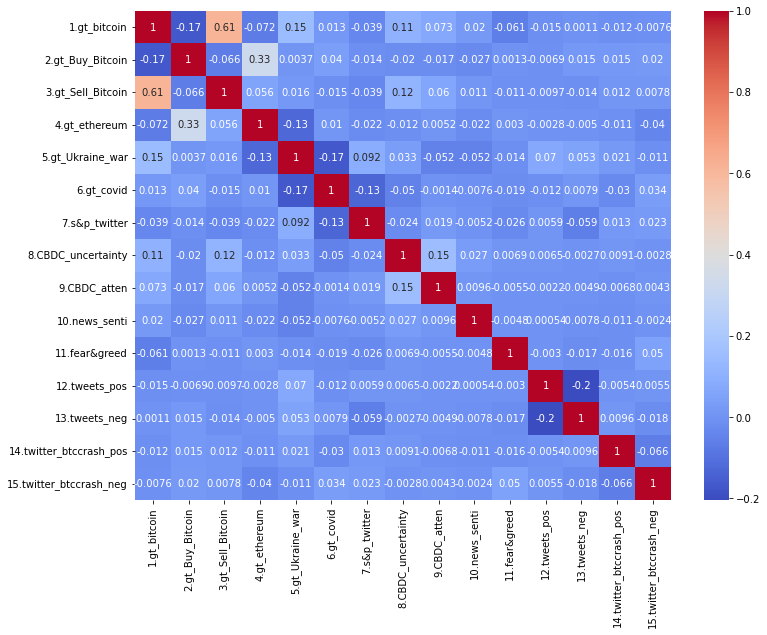

In [16]:
# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# show the plot
plt.show()

We assume correlation biger than 0.6 means highly correlated.
<li>'gt_bitcoin', 'gt_Sell_Bitcoin' are highly correlated. 
<b> we remove'gt_Sell_Bitcoin' </b>

In [65]:
df_remove = df_concat.drop(['3.gt_Sell_Bitcoin'], axis=1)
# replace "inf" with NaN
df_remove = df_remove.replace('inf', 0)
df_remove = df_remove.replace([np.inf, -np.inf], 0)
df_na = df_remove.fillna(0)
df_na

,1.gt_bitcoin,2.gt_Buy_Bitcoin,4.gt_ethereum,5.gt_Ukraine_war,6.gt_covid,7.s&p_twitter,8.CBDC_uncertainty,9.CBDC_atten,10.news_senti,11.fear&greed,12.tweets_pos,13.tweets_neg,14.twitter_btccrash_pos,15.twitter_btccrash_neg
0,-0.004854,-0.007752,-0.012500,0.000000,0.0,0.016326,-0.000129,-0.000248,-0.078837,-0.051282,0.099942,0.416978,-0.639346,0.463447
1,-0.004878,-0.007812,-0.012658,0.000000,0.0,-0.001000,-0.000129,-0.000248,-0.079216,0.054054,0.023959,-0.066043,0.616954,-0.030506
2,-0.004902,-0.007874,-0.012821,0.000000,0.0,-0.001001,0.000302,-0.000248,-0.051206,0.025641,0.071305,-0.274055,-0.264406,0.190058
3,0.019704,-0.015873,0.000000,0.000000,0.0,-0.001002,0.000302,-0.000248,-0.069200,0.025000,-0.134737,0.292769,2.471800,-0.433429
4,0.019324,-0.016129,0.000000,0.000000,0.0,-0.004174,0.000302,-0.000248,-0.079469,0.000000,0.162634,-0.274049,-0.171639,0.165810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,-0.007519,-0.022222,0.142857,-0.010989,0.0,0.000146,-0.000719,-0.000269,-0.015701,-0.034483,-0.192200,0.144226,0.568175,0.029575
1754,-0.007576,-0.022727,0.125000,-0.011111,0.0,0.000146,-0.000720,-0.000269,0.001568,-0.035714,0.172758,0.098971,-0.319385,-0.168254
1755,-0.007634,-0.023256,0.111111,-0.011236,0.0,-0.010970,-0.000720,-0.000269,-0.035043,0.037037,-0.127630,0.026982,-0.287368,0.329540
1756,-0.007692,-0.023810,0.100000,-0.011364,0.0,0.013389,-0.000721,-0.000637,-0.065282,0.000000,0.165572,-0.055837,-0.067539,0.101123


In [66]:
bitcoin = pd.read_csv('bitcoin.csv', usecols=[5], skiprows=9, names=['bitcoin'])
ether = pd.read_csv('ethereum.csv', usecols=[5], skiprows=9, names=['ether'])
BDM_exlarge = pd.read_csv('SP_BDM_exlarge.csv', usecols=[5], skiprows=9, names=['BDM_exlarge'])
BDM = pd.read_csv('SP_BDM.csv', usecols=[5], skiprows=9, names=['BDM'])

bitVolumn = pd.read_csv('bitcoin volumn.csv', usecols=[1], names=['bitcoinVolumn'])
bitVolumn = bitVolumn['bitcoinVolumn'].pct_change()
bitVolumnpct= bitVolumn.drop([0,1,2,3,4,5,6,7], axis=0)
bitVolumnpct = bitVolumnpct.reset_index(drop=True)
sp500 = pd.read_csv('SP500.csv', usecols=[1], names=['sp500'])
sp500 = sp500['sp500'].pct_change()
sp500pct= sp500.drop([0,1,2,3,4,5,6,7], axis=0)
sp500pct = sp500pct.reset_index(drop=True)
df_control = pd.concat([df_na,bitVolumnpct,sp500pct], axis=1)

Russell2000 = pd.read_csv('Russell2000.csv', usecols=[2], skiprows=9, names=['Russell2000'])
VIX = pd.read_csv('VIX.csv', usecols=[2], skiprows=9, names=['VIX'])
df_control2 = pd.concat([df_na,Russell2000,VIX], axis=1)

In [67]:
bitcoin2 = pd.read_csv('bitcoin.csv', usecols=[3], skiprows=31, names=['bitcoin'])
ether2 = pd.read_csv('ethereum.csv', usecols=[3], skiprows=31, names=['ether'])
BDM_exlarge2 = pd.read_csv('SP_BDM_exlarge.csv', usecols=[3], skiprows=31, names=['BDM_exlarge'])
BDM2 = pd.read_csv('SP_BDM.csv', usecols=[3], skiprows=31, names=['BDM'])

df_na2 = df_na.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], axis=0)
df_na2 = df_na2.reset_index(drop=True)

# 1. Bitcoin

In [34]:
bitcoin_concat = pd.concat([bitcoin,df_na], axis=1)
train, test = train_test_split(bitcoin_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.667350
         Iterations 8


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1215
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03624
Time:                        02:11:12   Log-Likelihood:                -820.84
converged:                       True   LL-Null:                       -851.71
Covariance Type:            nonrobust   LLR p-value:                 5.798e-08
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0592      0.061      0.966      0.334      -0.061       0.179
1.gt_bitcoin                1.1333      1.698      0.667      0.504      -2.195       4.461
2.gt_Buy_Bitcoin            3.2717      2.138      1.530      0.126      -0.918       7.462
4.gt_ethereum               1.1806      1.131      1.044      0.297      -1.036       3.398
5.gt_Ukraine_war            0.9997      0.699      1.430      0.153      -0.371       2.370
6.gt_covid                 -0.5332      1.485     -0.359      0.720      -3.444       2.378
7.s&p_twitter              33.7633      6.847      4.931      0.000      20.343      47.184
8.CBDC_uncertainty         55.1840     50.496      1.093      0.274     -43.787     154.155
9.CBDC_atten               23.2352     78.131      0.297      0.766    -129.898     176.368
10.news_senti               0.0021      0.004      0.494      0.621      -0.006       0.010
11.fear&greed              -0.3454      0.272     -1.270      0.204      -0.878       0.188
12.tweets_pos              -0.0881      0.430     -0.205      0.838      -0.931       0.754
13.tweets_neg              -1.0780      0.263     -4.096      0.000      -1.594      -0.562
14.twitter_btccrash_pos     0.0282      0.037      0.753      0.452      -0.045       0.102
15.twitter_btccrash_neg     0.0946      0.086      1.098      0.272      -0.074       0.264
===========================================================================================
"""

In [40]:
# control 1 
bitcoin_control = pd.concat([bitcoin,df_control], axis=1)
train, test = train_test_split(bitcoin_control, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.662429
         Iterations 6


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04425
Time:                        11:22:10   Log-Likelihood:                -814.79
converged:                       True   LL-Null:                       -852.51
Covariance Type:            nonrobust   LLR p-value:                 1.087e-09
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0278      0.062      0.451      0.652      -0.093       0.148
1.gt_bitcoin               -0.5847      1.788     -0.327      0.744      -4.089       2.919
2.gt_Buy_Bitcoin            5.1762      2.179      2.375      0.018       0.905       9.448
4.gt_ethereum               0.0182      1.069      0.017      0.986      -2.078       2.114
5.gt_Ukraine_war            0.3954      0.604      0.655      0.512      -0.787       1.578
6.gt_covid                 -0.5257      1.434     -0.366      0.714      -3.337       2.286
7.s&p_twitter             -30.2828     33.191     -0.912      0.362     -95.337      34.771
8.CBDC_uncertainty         39.2716     50.173      0.783      0.434     -59.066     137.609
9.CBDC_atten               40.8574     73.942      0.553      0.581    -104.066     185.781
10.news_senti              -0.1067      0.072     -1.473      0.141      -0.249       0.035
11.fear&greed              -0.3528      0.280     -1.261      0.207      -0.901       0.196
12.tweets_pos              -0.2764      0.427     -0.648      0.517      -1.112       0.560
13.tweets_neg              -1.2184      0.267     -4.561      0.000      -1.742      -0.695
14.twitter_btccrash_pos     0.0362      0.032      1.123      0.261      -0.027       0.099
15.twitter_btccrash_neg     0.0623      0.079      0.786      0.432      -0.093       0.218
bitcoinVolumn               0.3872      0.287      1.351      0.177      -0.175       0.949
sp500                      64.1299     31.763      2.019      0.043       1.876     126.383
===========================================================================================
"""

In [48]:
# control 2
bitcoin_control2 = pd.concat([bitcoin,df_control2], axis=1)
train, test = train_test_split(bitcoin_control2, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.659333
         Iterations 8


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04826
Time:                        11:26:08   Log-Likelihood:                -810.98
converged:                       True   LL-Null:                       -852.10
Covariance Type:            nonrobust   LLR p-value:                 6.544e-11
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0449      0.062      0.730      0.465      -0.076       0.166
1.gt_bitcoin                2.9751      1.829      1.627      0.104      -0.609       6.559
2.gt_Buy_Bitcoin            2.8530      2.207      1.293      0.196      -1.473       7.179
4.gt_ethereum               0.2760      1.126      0.245      0.806      -1.930       2.483
5.gt_Ukraine_war            0.4656      0.555      0.839      0.401      -0.622       1.553
6.gt_covid                 -0.3933      1.571     -0.250      0.802      -3.472       2.686
7.s&p_twitter              26.8282     14.380      1.866      0.062      -1.356      55.012
8.CBDC_uncertainty         40.3328     51.303      0.786      0.432     -60.220     140.886
9.CBDC_atten               75.9712     76.597      0.992      0.321     -74.156     226.098
10.news_senti               0.0019      0.004      0.502      0.616      -0.005       0.009
11.fear&greed               0.2049      0.220      0.933      0.351      -0.226       0.635
12.tweets_pos              -0.3229      0.423     -0.764      0.445      -1.152       0.506
13.tweets_neg              -1.1772      0.256     -4.593      0.000      -1.680      -0.675
14.twitter_btccrash_pos     0.0303      0.032      0.960      0.337      -0.032       0.092
15.twitter_btccrash_neg     0.0485      0.086      0.566      0.571      -0.119       0.217
Russell2000                16.9900      8.972      1.894      0.058      -0.594      34.574
VIX                        -0.3620      1.599     -0.226      0.821      -3.496       2.772
===========================================================================================
"""

In [85]:
# linear 
bitcoin_concat = pd.concat([bitcoin2,df_na2], axis=1)
train, test = train_test_split(bitcoin_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# fit linear regression model on training set
linear_model = sm.OLS(y_train, x_train)
result = linear_model.fit()

# predict outcome variable for the test set
y_pred = result.predict(x_test)

# calculate accuracy
accuracy = r2_score(y_test, y_pred)

# print accuracy
print('Accuracy:', accuracy)
result.summary()

Accuracy: 0.01555161007528616


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bitcoin   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     5.927
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.16e-11
Time:                        11:49:42   Log-Likelihood:                 3582.0
No. Observations:                1215   AIC:                            -7134.
Df Residuals:                    1200   BIC:                            -7057.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0352      0.000     91.700      0.000       0.034       0.036
1.gt_bitcoin               -0.0641      0.011     -5.868      0.000      -0.085      -0.043
2.gt_Buy_Bitcoin           -0.0697      0.013     -5.374      0.000      -0.095      -0.044
4.gt_ethereum              -0.0133      0.007     -1.935      0.053      -0.027       0.000
5.gt_Ukraine_war           -0.0005      0.004     -0.134      0.893      -0.008       0.007
6.gt_covid                  0.0058      0.009      0.637      0.524      -0.012       0.024
7.s&p_twitter               0.0186      0.038      0.491      0.623      -0.056       0.093
8.CBDC_uncertainty         -0.5590      0.324     -1.727      0.084      -1.194       0.076
9.CBDC_atten               -0.4269      0.478     -0.892      0.373      -1.366       0.512
10.news_senti            1.431e-06   6.17e-06      0.232      0.817   -1.07e-05    1.35e-05
11.fear&greed               0.0013      0.002      0.766      0.444      -0.002       0.005
12.tweets_pos               0.0004      0.003      0.130      0.896      -0.005       0.006
13.tweets_neg              -0.0009      0.002     -0.599      0.549      -0.004       0.002
14.twitter_btccrash_pos   9.52e-05      0.000      0.401      0.689      -0.000       0.001
15.twitter_btccrash_neg    -0.0009      0.000     -1.945      0.052      -0.002    7.27e-06
==============================================================================
Omnibus:                      456.560   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2224.967
Skew:                           1.699   Prob(JB):                         0.00
Kurtosis:                       8.692   Cond. No.                     7.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2. Ether

In [35]:
ether_concat = pd.concat([ether,df_na], axis=1)
train, test = train_test_split(ether_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.666674
         Iterations 6


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1215
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03788
Time:                        02:12:03   Log-Likelihood:                -820.01
converged:                       True   LL-Null:                       -852.30
Covariance Type:            nonrobust   LLR p-value:                 1.822e-08
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0553      0.061      0.903      0.367      -0.065       0.175
1.gt_bitcoin                1.8839      1.740      1.083      0.279      -1.526       5.294
2.gt_Buy_Bitcoin            3.7819      2.180      1.735      0.083      -0.490       8.054
4.gt_ethereum               0.7751      1.123      0.690      0.490      -1.425       2.975
5.gt_Ukraine_war           -1.3331      0.756     -1.763      0.078      -2.815       0.149
6.gt_covid                 -0.2371      1.906     -0.124      0.901      -3.974       3.500
7.s&p_twitter              36.9420      7.191      5.137      0.000      22.847      51.037
8.CBDC_uncertainty         33.4608     51.554      0.649      0.516     -67.582     134.504
9.CBDC_atten               83.0034     77.390      1.073      0.283     -68.678     234.685
10.news_senti              -0.0334      0.050     -0.667      0.505      -0.132       0.065
11.fear&greed               0.2527      0.218      1.161      0.245      -0.174       0.679
12.tweets_pos              -0.1615      0.448     -0.360      0.719      -1.040       0.717
13.tweets_neg              -1.0875      0.251     -4.332      0.000      -1.580      -0.595
14.twitter_btccrash_pos     0.0199      0.030      0.669      0.504      -0.038       0.078
15.twitter_btccrash_neg     0.0335      0.075      0.447      0.655      -0.113       0.180
===========================================================================================
"""

In [41]:
# control 1 
ether_control = pd.concat([ether,df_control], axis=1)
train, test = train_test_split(ether_control, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.666552
         Iterations 9


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03830
Time:                        11:22:58   Log-Likelihood:                -819.86
converged:                       True   LL-Null:                       -852.51
Covariance Type:            nonrobust   LLR p-value:                 6.520e-08
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0423      0.062      0.685      0.493      -0.079       0.163
1.gt_bitcoin               -0.4905      1.726     -0.284      0.776      -3.874       2.893
2.gt_Buy_Bitcoin            1.6150      2.130      0.758      0.448      -2.559       5.789
4.gt_ethereum               0.8731      1.097      0.796      0.426      -1.278       3.024
5.gt_Ukraine_war           -0.4315      0.637     -0.677      0.498      -1.681       0.818
6.gt_covid                 -2.0866      2.057     -1.014      0.311      -6.119       1.946
7.s&p_twitter             -16.9704     31.081     -0.546      0.585     -77.888      43.947
8.CBDC_uncertainty         25.2681     50.805      0.497      0.619     -74.308     124.844
9.CBDC_atten              102.4060     75.764      1.352      0.176     -46.089     250.902
10.news_senti               0.0024      0.006      0.413      0.680      -0.009       0.014
11.fear&greed              -0.2241      0.268     -0.835      0.404      -0.750       0.302
12.tweets_pos               0.2346      0.425      0.551      0.581      -0.599       1.068
13.tweets_neg              -0.9057      0.256     -3.539      0.000      -1.407      -0.404
14.twitter_btccrash_pos    -0.0023      0.038     -0.061      0.952      -0.077       0.072
15.twitter_btccrash_neg    -0.0037      0.083     -0.045      0.964      -0.166       0.158
bitcoinVolumn               0.0876      0.286      0.307      0.759      -0.472       0.647
sp500                      54.8208     30.026      1.826      0.068      -4.029     113.670
===========================================================================================
"""

In [49]:
# control 2 
ether_control2 = pd.concat([ether,df_control2], axis=1)
train, test = train_test_split(ether_control2, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.671506
         Iterations 6


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03100
Time:                        11:26:24   Log-Likelihood:                -825.95
converged:                       True   LL-Null:                       -852.37
Covariance Type:            nonrobust   LLR p-value:                 8.002e-06
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0298      0.061      0.491      0.623      -0.089       0.149
1.gt_bitcoin                0.8468      1.743      0.486      0.627      -2.570       4.263
2.gt_Buy_Bitcoin            3.6869      2.166      1.702      0.089      -0.558       7.932
4.gt_ethereum               0.4302      1.091      0.394      0.693      -1.708       2.568
5.gt_Ukraine_war           -0.1018      0.620     -0.164      0.870      -1.317       1.114
6.gt_covid                  0.5382      1.369      0.393      0.694      -2.146       3.222
7.s&p_twitter              13.1465     13.170      0.998      0.318     -12.667      38.960
8.CBDC_uncertainty         28.2006     48.526      0.581      0.561     -66.909     123.310
9.CBDC_atten               79.8407     73.118      1.092      0.275     -63.469     223.150
10.news_senti              -0.0506      0.062     -0.811      0.417      -0.173       0.072
11.fear&greed              -0.0117      0.234     -0.050      0.960      -0.470       0.446
12.tweets_pos               0.2424      0.429      0.565      0.572      -0.599       1.083
13.tweets_neg              -0.9889      0.255     -3.877      0.000      -1.489      -0.489
14.twitter_btccrash_pos     0.0235      0.029      0.805      0.421      -0.034       0.081
15.twitter_btccrash_neg     0.0692      0.097      0.714      0.475      -0.121       0.259
Russell2000                13.3765      8.762      1.527      0.127      -3.798      30.551
VIX                        -0.7883      1.533     -0.514      0.607      -3.793       2.216
===========================================================================================
"""

In [86]:
ether_concat = pd.concat([ether2,df_na2], axis=1)
train, test = train_test_split(ether_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# fit linear regression model on training set
linear_model = sm.OLS(y_train, x_train)
result = linear_model.fit()

# predict outcome variable for the test set
y_pred = result.predict(x_test)

# calculate accuracy
accuracy = r2_score(y_test, y_pred)

# print accuracy
print('Accuracy:', accuracy)
result.summary()

Accuracy: 0.033537181361875


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ether   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.844
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.45e-11
Time:                        11:50:23   Log-Likelihood:                 3385.6
No. Observations:                1215   AIC:                            -6741.
Df Residuals:                    1200   BIC:                            -6665.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0467      0.000    103.596      0.000       0.046       0.048
1.gt_bitcoin               -0.0723      0.013     -5.778      0.000      -0.097      -0.048
2.gt_Buy_Bitcoin           -0.0671      0.016     -4.178      0.000      -0.099      -0.036
4.gt_ethereum              -0.0277      0.008     -3.288      0.001      -0.044      -0.011
5.gt_Ukraine_war           -0.0023      0.004     -0.513      0.608      -0.011       0.007
6.gt_covid                  0.0399      0.018      2.251      0.025       0.005       0.075
7.s&p_twitter               0.0076      0.046      0.166      0.868      -0.082       0.098
8.CBDC_uncertainty         -0.3512      0.362     -0.970      0.332      -1.061       0.359
9.CBDC_atten               -0.6118      0.530     -1.154      0.249      -1.652       0.428
10.news_senti            3.459e-06   7.25e-06      0.477      0.633   -1.08e-05    1.77e-05
11.fear&greed               0.0011      0.002      0.662      0.508      -0.002       0.004
12.tweets_pos               0.0021      0.003      0.653      0.514      -0.004       0.008
13.tweets_neg              -0.0004      0.002     -0.245      0.806      -0.004       0.003
14.twitter_btccrash_pos    -0.0001      0.000     -0.424      0.671      -0.001       0.000
15.twitter_btccrash_neg    -0.0010      0.001     -1.623      0.105      -0.002       0.000
==============================================================================
Omnibus:                      393.229   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1338.155
Skew:                           1.575   Prob(JB):                    2.65e-291
Kurtosis:                       7.064   Cond. No.                     7.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3. BDM_exlarge

In [36]:
BDM_exlarge_concat = pd.concat([BDM_exlarge,df_na], axis=1)
train, test = train_test_split(BDM_exlarge_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.656502
         Iterations 8


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1215
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04833
Time:                        02:12:47   Log-Likelihood:                -807.50
converged:                       True   LL-Null:                       -848.50
Covariance Type:            nonrobust   LLR p-value:                 1.198e-11
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1292      0.061      2.104      0.035       0.009       0.250
1.gt_bitcoin               -2.6187      1.788     -1.465      0.143      -6.123       0.885
2.gt_Buy_Bitcoin           -0.2501      2.155     -0.116      0.908      -4.473       3.973
4.gt_ethereum               0.9902      1.109      0.893      0.372      -1.184       3.164
5.gt_Ukraine_war           -0.9134      0.577     -1.583      0.113      -2.044       0.217
6.gt_covid                 -0.3664      1.505     -0.243      0.808      -3.316       2.584
7.s&p_twitter              53.8357      7.615      7.070      0.000      38.910      68.761
8.CBDC_uncertainty         34.1193     52.336      0.652      0.514     -68.457     136.696
9.CBDC_atten              100.2636     77.987      1.286      0.199     -52.588     253.115
10.news_senti              -0.0022      0.005     -0.462      0.644      -0.011       0.007
11.fear&greed               0.5172      0.248      2.083      0.037       0.031       1.004
12.tweets_pos              -0.0865      0.428     -0.202      0.840      -0.925       0.752
13.tweets_neg              -0.3033      0.239     -1.270      0.204      -0.772       0.165
14.twitter_btccrash_pos     0.0365      0.033      1.091      0.275      -0.029       0.102
15.twitter_btccrash_neg     0.0826      0.099      0.835      0.404      -0.111       0.276
===========================================================================================
"""

In [42]:
# control 1 
BDM_exlarge_control = pd.concat([BDM_exlarge,df_control], axis=1)
train, test = train_test_split(BDM_exlarge_control, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.662801
         Iterations 8


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04100
Time:                        11:23:18   Log-Likelihood:                -815.25
converged:                       True   LL-Null:                       -850.10
Covariance Type:            nonrobust   LLR p-value:                 1.126e-08
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1246      0.062      2.017      0.044       0.003       0.246
1.gt_bitcoin               -2.2481      1.837     -1.224      0.221      -5.849       1.352
2.gt_Buy_Bitcoin            0.3660      2.171      0.169      0.866      -3.889       4.621
4.gt_ethereum               0.1947      1.090      0.179      0.858      -1.942       2.331
5.gt_Ukraine_war           -0.8677      0.584     -1.486      0.137      -2.012       0.277
6.gt_covid                 -1.9831      1.783     -1.112      0.266      -5.478       1.512
7.s&p_twitter             -35.4500     31.615     -1.121      0.262     -97.415      26.515
8.CBDC_uncertainty         57.1734     51.138      1.118      0.264     -43.055     157.401
9.CBDC_atten               50.0088     75.226      0.665      0.506     -97.431     197.449
10.news_senti              -0.0020      0.004     -0.543      0.587      -0.009       0.005
11.fear&greed               0.5322      0.262      2.029      0.043       0.018       1.046
12.tweets_pos              -0.2939      0.437     -0.673      0.501      -1.150       0.562
13.tweets_neg              -0.5914      0.256     -2.312      0.021      -1.093      -0.090
14.twitter_btccrash_pos     0.0086      0.038      0.230      0.818      -0.065       0.082
15.twitter_btccrash_neg     0.1090      0.103      1.062      0.288      -0.092       0.310
bitcoinVolumn              -0.0312      0.286     -0.109      0.913      -0.592       0.529
sp500                      76.4562     30.426      2.513      0.012      16.822     136.090
===========================================================================================
"""

In [50]:
# control 2 
BDM_exlarge_control2 = pd.concat([BDM_exlarge,df_control2], axis=1)
train, test = train_test_split(BDM_exlarge_control2, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.652597
         Iterations 6


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.05303
Time:                        11:26:39   Log-Likelihood:                -802.69
converged:                       True   LL-Null:                       -847.65
Covariance Type:            nonrobust   LLR p-value:                 2.607e-12
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1538      0.062      2.472      0.013       0.032       0.276
1.gt_bitcoin               -2.7015      1.836     -1.471      0.141      -6.301       0.898
2.gt_Buy_Bitcoin            0.5163      2.196      0.235      0.814      -3.788       4.821
4.gt_ethereum               1.4594      1.124      1.298      0.194      -0.744       3.663
5.gt_Ukraine_war           -0.2411      0.591     -0.408      0.684      -1.400       0.918
6.gt_covid                 -0.7125      1.636     -0.436      0.663      -3.918       2.493
7.s&p_twitter               4.3071     13.844      0.311      0.756     -22.826      31.440
8.CBDC_uncertainty        -11.7152     50.931     -0.230      0.818    -111.539      88.108
9.CBDC_atten               71.1978     74.173      0.960      0.337     -74.178     216.573
10.news_senti               0.0712      0.053      1.351      0.177      -0.032       0.175
11.fear&greed               0.6136      0.257      2.390      0.017       0.111       1.117
12.tweets_pos              -0.3034      0.430     -0.706      0.480      -1.146       0.539
13.tweets_neg              -0.6669      0.248     -2.690      0.007      -1.153      -0.181
14.twitter_btccrash_pos     0.0586      0.038      1.549      0.121      -0.016       0.133
15.twitter_btccrash_neg     0.1726      0.104      1.666      0.096      -0.030       0.376
Russell2000                28.1545      9.350      3.011      0.003       9.829      46.480
VIX                        -2.2106      1.547     -1.429      0.153      -5.243       0.822
===========================================================================================
"""

In [87]:
BDM_exlarge_concat = pd.concat([BDM_exlarge2,df_na2], axis=1)
train, test = train_test_split(BDM_exlarge_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# fit linear regression model on training set
linear_model = sm.OLS(y_train, x_train)
result = linear_model.fit()

# predict outcome variable for the test set
y_pred = result.predict(x_test)

# calculate accuracy
accuracy = r2_score(y_test, y_pred)

# print accuracy
print('Accuracy:', accuracy)
result.summary()

Accuracy: -0.00211532924680613


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BDM_exlarge   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     6.265
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.21e-12
Time:                        11:50:50   Log-Likelihood:                 3645.6
No. Observations:                1215   AIC:                            -7261.
Df Residuals:                    1200   BIC:                            -7185.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0362      0.000    100.044      0.000       0.036       0.037
1.gt_bitcoin               -0.0547      0.010     -5.397      0.000      -0.075      -0.035
2.gt_Buy_Bitcoin           -0.0860      0.013     -6.610      0.000      -0.112      -0.060
4.gt_ethereum              -0.0151      0.007     -2.269      0.023      -0.028      -0.002
5.gt_Ukraine_war           -0.0007      0.004     -0.204      0.839      -0.008       0.006
6.gt_covid                  0.0128      0.008      1.604      0.109      -0.003       0.028
7.s&p_twitter              -0.0115      0.034     -0.334      0.739      -0.079       0.056
8.CBDC_uncertainty         -0.1104      0.303     -0.365      0.715      -0.704       0.483
9.CBDC_atten               -0.5321      0.460     -1.157      0.247      -1.434       0.370
10.news_senti            1.142e-06   5.85e-06      0.195      0.845   -1.03e-05    1.26e-05
11.fear&greed               0.0013      0.002      0.757      0.449      -0.002       0.005
12.tweets_pos              -0.0009      0.003     -0.333      0.740      -0.006       0.004
13.tweets_neg           -8.666e-05      0.001     -0.058      0.953      -0.003       0.003
14.twitter_btccrash_pos -3.738e-05      0.000     -0.250      0.803      -0.000       0.000
15.twitter_btccrash_neg    -0.0002      0.001     -0.360      0.719      -0.001       0.001
==============================================================================
Omnibus:                      119.768   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.370
Skew:                           0.729   Prob(JB):                     3.05e-39
Kurtosis:                       4.173   Cond. No.                     7.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4. BDM

In [37]:
BDM_concat = pd.concat([BDM,df_na], axis=1)
train, test = train_test_split(BDM_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.662132
         Iterations 8


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1215
Method:                           MLE   Df Model:                           14
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.04341
Time:                        02:12:49   Log-Likelihood:                -814.42
converged:                       True   LL-Null:                       -851.39
Covariance Type:            nonrobust   LLR p-value:                 3.724e-10
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0627      0.061      1.024      0.306      -0.057       0.183
1.gt_bitcoin               -2.9838      1.777     -1.679      0.093      -6.467       0.500
2.gt_Buy_Bitcoin            2.0670      2.168      0.953      0.340      -2.183       6.317
4.gt_ethereum               1.9967      1.160      1.722      0.085      -0.276       4.270
5.gt_Ukraine_war           -0.6654      0.675     -0.986      0.324      -1.988       0.658
6.gt_covid                 -3.3320      2.251     -1.480      0.139      -7.744       1.080
7.s&p_twitter              41.6464      7.213      5.773      0.000      27.508      55.784
8.CBDC_uncertainty        -42.9965     51.646     -0.833      0.405    -144.220      58.227
9.CBDC_atten               90.3815     77.039      1.173      0.241     -60.613     241.376
10.news_senti               0.0021      0.004      0.574      0.566      -0.005       0.009
11.fear&greed               0.6659      0.265      2.513      0.012       0.146       1.185
12.tweets_pos              -0.5475      0.429     -1.277      0.202      -1.388       0.293
13.tweets_neg              -0.6143      0.262     -2.342      0.019      -1.128      -0.100
14.twitter_btccrash_pos     0.0403      0.034      1.179      0.239      -0.027       0.107
15.twitter_btccrash_neg     0.1314      0.104      1.266      0.205      -0.072       0.335
===========================================================================================
"""

In [43]:
# control 1 
BDM_control = pd.concat([BDM,df_control], axis=1)
train, test = train_test_split(BDM_control, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.645457
         Iterations 6


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.06720
Time:                        11:23:40   Log-Likelihood:                -793.91
converged:                       True   LL-Null:                       -851.11
Covariance Type:            nonrobust   LLR p-value:                 6.532e-17
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0689      0.063      1.095      0.274      -0.054       0.192
1.gt_bitcoin               -1.7020      1.812     -0.939      0.347      -5.253       1.849
2.gt_Buy_Bitcoin            3.4049      2.171      1.569      0.117      -0.849       7.659
4.gt_ethereum               1.2281      1.122      1.094      0.274      -0.972       3.428
5.gt_Ukraine_war           -0.9416      0.719     -1.309      0.190      -2.351       0.468
6.gt_covid                 -1.3373      2.521     -0.530      0.596      -6.279       3.604
7.s&p_twitter             -54.9899     34.654     -1.587      0.113    -122.910      12.930
8.CBDC_uncertainty          7.3412     50.912      0.144      0.885     -92.445     107.128
9.CBDC_atten               89.7841     73.316      1.225      0.221     -53.913     233.481
10.news_senti              -0.0286      0.062     -0.460      0.645      -0.151       0.093
11.fear&greed               0.5415      0.275      1.970      0.049       0.003       1.080
12.tweets_pos              -0.8925      0.445     -2.003      0.045      -1.766      -0.019
13.tweets_neg              -0.7553      0.253     -2.990      0.003      -1.250      -0.260
14.twitter_btccrash_pos     0.0702      0.040      1.742      0.082      -0.009       0.149
15.twitter_btccrash_neg     0.1186      0.103      1.150      0.250      -0.083       0.321
bitcoinVolumn               0.3001      0.283      1.060      0.289      -0.255       0.855
sp500                     112.8856     33.671      3.353      0.001      46.891     178.880
===========================================================================================
"""

In [51]:
# control 2 
BDM_control2 = pd.concat([BDM,df_control2], axis=1)
train, test = train_test_split(BDM_control2, test_size = 0.3)
x_train = train.iloc[0:,1:18]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:18]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.647752
         Iterations 8


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1213
Method:                           MLE   Df Model:                           16
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.06277
Time:                        11:26:54   Log-Likelihood:                -796.73
converged:                       True   LL-Null:                       -850.10
Covariance Type:            nonrobust   LLR p-value:                 1.876e-15
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1143      0.063      1.829      0.067      -0.008       0.237
1.gt_bitcoin               -0.0764      1.862     -0.041      0.967      -3.725       3.573
2.gt_Buy_Bitcoin            2.8936      2.267      1.277      0.202      -1.549       7.336
4.gt_ethereum               1.7604      1.167      1.509      0.131      -0.526       4.047
5.gt_Ukraine_war           -0.4712      0.558     -0.844      0.399      -1.566       0.623
6.gt_covid                 -2.7687      2.257     -1.227      0.220      -7.192       1.655
7.s&p_twitter               0.6359     14.581      0.044      0.965     -27.942      29.213
8.CBDC_uncertainty          9.2443     51.324      0.180      0.857     -91.348     109.837
9.CBDC_atten               35.4673     74.827      0.474      0.636    -111.191     182.126
10.news_senti               0.0021      0.005      0.463      0.644      -0.007       0.011
11.fear&greed               0.7109      0.271      2.623      0.009       0.180       1.242
12.tweets_pos              -0.5530      0.442     -1.250      0.211      -1.420       0.314
13.tweets_neg              -0.7240      0.248     -2.921      0.003      -1.210      -0.238
14.twitter_btccrash_pos     0.0452      0.036      1.258      0.208      -0.025       0.116
15.twitter_btccrash_neg     0.0984      0.094      1.052      0.293      -0.085       0.282
Russell2000                33.0161      9.487      3.480      0.001      14.422      51.610
VIX                        -3.2085      1.662     -1.931      0.054      -6.466       0.049
===========================================================================================
"""

In [88]:
BDM_concat = pd.concat([BDM2,df_na2], axis=1)
train, test = train_test_split(BDM_concat, test_size = 0.3)
x_train = train.iloc[0:,1:16]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:16]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# fit linear regression model on training set
linear_model = sm.OLS(y_train, x_train)
result = linear_model.fit()

# predict outcome variable for the test set
y_pred = result.predict(x_test)

# calculate accuracy
accuracy = r2_score(y_test, y_pred)

# print accuracy
print('Accuracy:', accuracy)
result.summary()

Accuracy: 0.0742158167880016


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BDM   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     5.475
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.72e-10
Time:                        11:51:32   Log-Likelihood:                 3857.8
No. Observations:                1215   AIC:                            -7686.
Df Residuals:                    1200   BIC:                            -7609.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0320      0.000    104.515      0.000       0.031       0.033
1.gt_bitcoin               -0.0455      0.009     -4.961      0.000      -0.064      -0.028
2.gt_Buy_Bitcoin           -0.0499      0.011     -4.649      0.000      -0.071      -0.029
4.gt_ethereum              -0.0191      0.005     -3.588      0.000      -0.030      -0.009
5.gt_Ukraine_war            0.0002      0.003      0.076      0.939      -0.006       0.006
6.gt_covid                  0.0027      0.007      0.379      0.705      -0.011       0.016
7.s&p_twitter               0.0234      0.031      0.752      0.452      -0.038       0.084
8.CBDC_uncertainty         -0.3838      0.247     -1.556      0.120      -0.868       0.100
9.CBDC_atten               -0.4445      0.361     -1.233      0.218      -1.152       0.263
10.news_senti            7.065e-07   4.91e-06      0.144      0.886   -8.94e-06    1.03e-05
11.fear&greed               0.0004      0.001      0.376      0.707      -0.002       0.003
12.tweets_pos              -0.0007      0.002     -0.318      0.751      -0.005       0.004
13.tweets_neg              -0.0010      0.001     -0.873      0.383      -0.003       0.001
14.twitter_btccrash_pos    -0.0002      0.000     -0.822      0.411      -0.001       0.000
15.twitter_btccrash_neg    -0.0003      0.000     -0.723      0.470      -0.001       0.001
==============================================================================
Omnibus:                      150.192   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.522
Skew:                           0.834   Prob(JB):                     1.32e-53
Kurtosis:                       4.424   Cond. No.                     7.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""